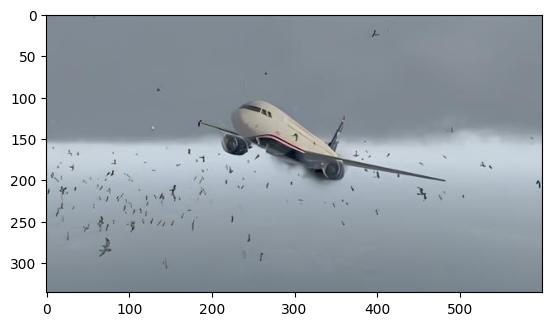

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('aviao2.jpg'))

## Faz análise dos dados de ocorrências de acidentes aeronáuticos

Este projeto tem como objetivo fazer uma análise ampla dos dados de ocorrências de acidentes aeronáuticos limpos e tratados no projeto Cenipa_limpa_trata_armazena, oferecendo uma visão ampla com a descrição e diagnóstico dos dados.

In [2]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [3]:
# le os acidentes tratados para análise
df_acidentes = pd.read_csv('arquivos_tratados/df_acidentes_aeronauticos.csv')

In [4]:
# reconhece primeiras linhas
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,NaN,1,NÃO,NaN,NaN,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,NaN,1,NÃO,NaN,NaN,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,NaN,1,NÃO,NaN,NaN,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [5]:
# verifica nome das colunas
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Tipo de Ocorrência

In [6]:
# conta a quantidade de tipo de ocorrência geral
df_aux = sqldf('select ocorrencia_tipo as ocorr_tipo, ' \
                'count(ocorrencia_aerodromo) as qtde_tipo_ocorr ' \
                'from df_acidentes ' \
                'group by ocorrencia_tipo' 
                          )

In [7]:
# calcula percentual de qtde
df_aux['perc_tipo_ocorr'] = round((df_aux.qtde_tipo_ocorr / df_aux.qtde_tipo_ocorr.sum())*100, 2)

In [8]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.ocorrencia_tipo = ax.ocorr_tipo)'
                     )

In [9]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['ocorr_tipo'], axis=1)

In [10]:
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_tipo_ocorr,perc_tipo_ocorr
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,1197,12.19
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,1197,12.19
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,64,0.65


In [11]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Saída da Pista

In [12]:
# verifica se existe algum valor diferente de SIM E NÃO
display(df_acidentes.ocorrencia_saida_pista.value_counts())

ocorrencia_saida_pista
NÃO    9062
SIM     757
Name: count, dtype: int64

In [13]:
# conta a quantidade de saída da pista por aeródromo
df_aux = sqldf('select e.ocorrencia_aerodromo as aerodromo, ' \
                'count(e.ocorrencia_aerodromo) as qtde_ocorr_aerod, ' \
                'max((select sum(1) from df_acidentes i ' \
                '    where i.ocorrencia_aerodromo = e.ocorrencia_aerodromo and ' \
                '          i.ocorrencia_saida_pista = "SIM")) as qtde_saip_aerod ' \
                'from df_acidentes e ' \
                'group by e.ocorrencia_aerodromo '
                )

In [14]:
# inclui coluna de total de saida da pista por aeródromo
df_aux['qtde_saip_total'] = \
    df_acidentes.ocorrencia_saida_pista.loc[(df_acidentes['ocorrencia_saida_pista'] == 'SIM')].count()

In [15]:
# calcula percentual de qtde de saidas da pista sobre a qtde de ocorrências do aeródromo
df_aux['perc_saip_aerod'] = round((df_aux.qtde_saip_aerod / df_aux.qtde_ocorr_aerod)*100, 2)
df_aux['perc_saip_total'] = round((df_aux.qtde_saip_aerod / df_aux.qtde_saip_total)*100, 2)

In [16]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.ocorrencia_aerodromo = ax.aerodromo)'
                     )

In [17]:
# apaga colunas
df_acidentes = df_acidentes.drop(columns=['aerodromo'], axis=1)

In [18]:
# verifica novas colunas
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_tipo_ocorr,perc_tipo_ocorr,qtde_ocorr_aerod,qtde_saip_aerod,qtde_saip_total,perc_saip_aerod,perc_saip_total
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,1197,12.19,162,7.0,757,4.32,0.92
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,1197,12.19,3124,132.0,757,4.23,17.44
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,64,0.65,149,5.0,757,3.36,0.66


In [19]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Qtde de Aeronaves Envolvidas

In [20]:
# conta a quantidade de aeronaves envolvidas por aerodromo 
df_aux = sqldf('select ocorrencia_aerodromo as aerodromo, ' \
                'sum(total_aeronaves_envolvidas) as qtde_aeron ' \
                'from df_acidentes ' \
                'group by ocorrencia_aerodromo '
                )

In [21]:
# calcula percentual de qtde de ocorrências no aeródromo
df_aux['perc_aeron_aerod'] = round((df_aux.qtde_aeron / df_acidentes.qtde_ocorr_aerod)*100, 2)
df_aux['perc_aeron_total'] = round((df_aux.qtde_aeron / df_acidentes.qtde_ocorr_aerod.sum())*100, 2)

In [22]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.ocorrencia_aerodromo = ax.aerodromo)'
                     )

In [23]:
# apaga colunas
df_acidentes = df_acidentes.drop(columns=['aerodromo'], axis=1)

In [24]:
# verifica novas colunas
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_tipo_ocorr,perc_tipo_ocorr,qtde_ocorr_aerod,qtde_saip_aerod,qtde_saip_total,perc_saip_aerod,perc_saip_total,qtde_aeron,perc_aeron_aerod,perc_aeron_total
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,1197,12.19,162,7.0,757,4.32,0.92,163,122.56,0.00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,1197,12.19,3124,132.0,757,4.23,17.44,3147,1942.59,0.03
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,64,0.65,149,5.0,757,3.36,0.66,151,4.83,0.00


In [25]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Período do dia da Ocorrência

In [26]:
# conta a quantidade de ocorrências e agrupa por aerodromo e período
df_aux = sqldf('select ocorrencia_aerodromo as aerodromo, periodo as periodo2, ' \
                'count(ocorrencia_aerodromo) as qtde_periodo_aerod ' \
                'from df_acidentes ' \
                'group by ocorrencia_aerodromo, periodo2 ' 
                )

In [27]:
# cria coluna de percentual da classe sobre o total
df_aux['perc_periodo_aerod'] = round((df_aux.qtde_periodo_aerod / df_aux.qtde_periodo_aerod.sum()) * 100, 2)

In [28]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.ocorrencia_aerodromo = ax.aerodromo and ' \
                     '                         ac.periodo = ax.periodo2 ) '
                     )

In [29]:
# apaga colunas
df_acidentes = df_acidentes.drop(columns=['aerodromo', 'periodo2'], axis=1)

In [30]:
# verifica novas colunas
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_tipo_ocorr,perc_tipo_ocorr,qtde_ocorr_aerod,qtde_saip_aerod,qtde_saip_total,perc_saip_aerod,perc_saip_total,qtde_aeron,perc_aeron_aerod,perc_aeron_total,qtde_periodo_aerod,perc_periodo_aerod
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,1197,12.19,162,7.0,757,4.32,0.92,163,122.56,0.00,50,0.51
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,1197,12.19,3124,132.0,757,4.23,17.44,3147,1942.59,0.03,841,8.57
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,64,0.65,149,5.0,757,3.36,0.66,151,4.83,0.00,35,0.36


In [31]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Classificação da Ocorrência (ex: incidente, acidente, etc)

In [32]:

# conta a quantidade de ocorrências e agrupa pela classe 
df_aux = sqldf('select ocorrencia_aerodromo as aerodromo, ' \
                'ocorrencia_classificacao as classificacao, ' \
                'count(ocorrencia_classificacao) as qtde_classif ' \
                'from df_acidentes ' \
                'group by ocorrencia_aerodromo, ocorrencia_classificacao '
                )

In [33]:
# cria coluna de percentual da classe sobre o total
df_aux['perc_classif'] = round((df_aux.qtde_classif / df_aux.qtde_classif.sum()) * 100, 2)

In [34]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.ocorrencia_aerodromo = ax.aerodromo and ' \
                     '                         ac.ocorrencia_classificacao = ax.classificacao ) '
                     )

In [35]:
# apaga colunas
df_acidentes = df_acidentes.drop(columns=['aerodromo', 'classificacao'], axis=1)

In [36]:
# verifica novas colunas
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_tipo_ocorr,perc_tipo_ocorr,qtde_ocorr_aerod,qtde_saip_aerod,qtde_saip_total,perc_saip_aerod,perc_saip_total,qtde_aeron,perc_aeron_aerod,perc_aeron_total,qtde_periodo_aerod,perc_periodo_aerod,qtde_classif,perc_classif
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,1197,12.19,162,7.0,757,4.32,0.92,163,122.56,0.00,50,0.51,147,1.50
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,1197,12.19,3124,132.0,757,4.23,17.44,3147,1942.59,0.03,841,8.57,1127,11.48
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,64,0.65,149,5.0,757,3.36,0.66,151,4.83,0.00,35,0.36,140,1.43


In [37]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

In [38]:
# salva os dados para análise em arquivo csv
df_acidentes.to_csv('arquivos_analise/df_acidentes_analise_ocorr.csv', index=False)

- A análise dos dados gravados em arquivos csv anteriormente será feita no projeto Cenipa_dash_analitico publicado no endereço:
https://github.com/jairobernardesjunior/Cenipa_dash_analitico